<a href="https://colab.research.google.com/github/yhanyi/MLNotebooks/blob/main/PytorchExoplanets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exoplanets Using Pytorch

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

import torch
import torch.nn as nn
import torch.optim as optim
import tqdm

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, classification_report
from sklearn.model_selection import StratifiedKFold, train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

### Datasets

In [2]:
train_raw = pd.read_csv("/content/exoTrain.csv")
test_raw = pd.read_csv("/content/exoTest.csv")

In [3]:
train_raw.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [4]:
train_raw.isna().sum()

LABEL        0
FLUX.1       0
FLUX.2       0
FLUX.3       0
FLUX.4       0
            ..
FLUX.3193    0
FLUX.3194    0
FLUX.3195    0
FLUX.3196    0
FLUX.3197    0
Length: 3198, dtype: int64

In [5]:
X_data = train_raw.drop("LABEL", axis=1)
y_data = train_raw["LABEL"]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, stratify=y_data)

### KNN

In [6]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00      1011
           2       0.00      0.00      0.00         7

    accuracy                           0.99      1018
   macro avg       0.50      0.50      0.50      1018
weighted avg       0.99      0.99      0.99      1018



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


How the hell is it so accurate lmao.

### XGB

In [7]:
xgb = XGBClassifier()
y_xgb = (lambda x: x-1)(y_train)
xgb.fit(X_train, y_xgb, verbose=0)
y_pred = (lambda x: x+1)(xgb.predict(X_test))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00      1011
           2       0.00      0.00      0.00         7

    accuracy                           0.99      1018
   macro avg       0.50      0.50      0.50      1018
weighted avg       0.99      0.99      0.99      1018



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Pytorch

In [8]:
class TorchModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(3197, 3197)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(3197, 3197)
        self.act2 = nn.ReLU()
        self.layer3 = nn.Linear(3197, 3197)
        self.act3 = nn.ReLU()
        self.output = nn.Linear(3197, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.act3(self.layer3(x))
        x = self.sigmoid(self.output(x))
        return x

In [9]:
y_data = y_data.map(lambda x: x-1)
X_tensor = torch.tensor(X_data.values, dtype=torch.float32)
y_tensor = torch.tensor(y_data.values, dtype=torch.float32).reshape(-1, 1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, shuffle=True)

In [11]:
def train_model(model, X_train, y_train, X_valid, y_valid):
  loss_function = nn.BCELoss() # Binary Cross Entropy
  optimizer = optim.Adam(model.parameters(), lr=0.0001)

  n_epochs = 100
  batch_size = 10
  batch_start = torch.arange(0, len(X_train), batch_size)

  # Recording the best model
  best_acc = -np.inf
  best_weights = None

  for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
      for start in bar:
        X_batch = X_train[start: start + batch_size] # Batching
        y_batch = y_train[start: start + batch_size]
        y_pred = model(X_batch) # Forward pass
        loss = loss_function(y_pred, y_batch)
        optimizer.zero_grad() # Backward pass
        optimizer.step() # Updating weights
        acc = (y_pred.round() == y_batch).float().mean()
        bar.set_postfix(
            loss=float(loss),
            acc=float(acc)
        )
    model.eval()
    y_pred = model(X_valid)
    acc = (y_pred.round() == y_valid).float().mean()
    acc = float(acc)
    if acc > best_acc:
      best_acc = acc
      best_weights = copy.deepcopy(model.state_dict())

  model.load_state_dict(best_weights)
  return best_acc

In [12]:
model = TorchModel()
acc = train_model(model, X_train, y_train, X_test, y_test)
print(f"Final model accuracy: {acc*100:.2f}%")

Final model accuracy: 97.74%


Wow Pytorch stronk.

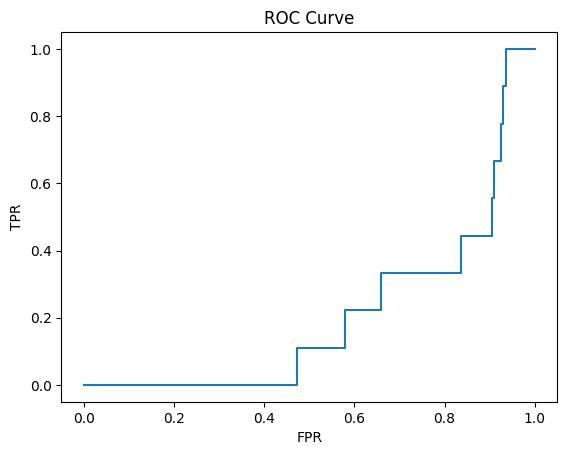

In [13]:
 model.eval()
 with torch.no_grad():
  y_pred = model(X_test)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  plt.plot(fpr, tpr) # ROC curve = TPR vs FPR
  plt.title("ROC Curve")
  plt.xlabel("FPR")
  plt.ylabel("TPR")
  plt.show()